# Engineering Economics / Python project


## data cleaning 
 

### Importing the necessary liberaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from functions import *

### Loading The Data

In [2]:
data = pd.read_excel('data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Years       33 non-null     int64  
 1   Salary      30 non-null     float64
 2   material 1  33 non-null     float64
 3   material 2  33 non-null     float64
 4   demand      33 non-null     int64  
 5   price       33 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


### Dealing with Missing Values


In [3]:
missing_values = data.isnull().sum()
missing_values


Years         0
Salary        3
material 1    0
material 2    0
demand        0
price         0
dtype: int64

#### We use interpolation to deal with them.

In [4]:
data = data.interpolate(method='linear')
data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


## Predicting


### Predicting Future Salaries with Linear Regression

In [5]:
X = data['Years'].values.reshape(-1,1)
Y = data['Salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)


LinearRegression()

### The Accuracy of the Prediction

In [6]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score

0.9312739842698768

### Visuallizing the Fitted Line for the Prediction



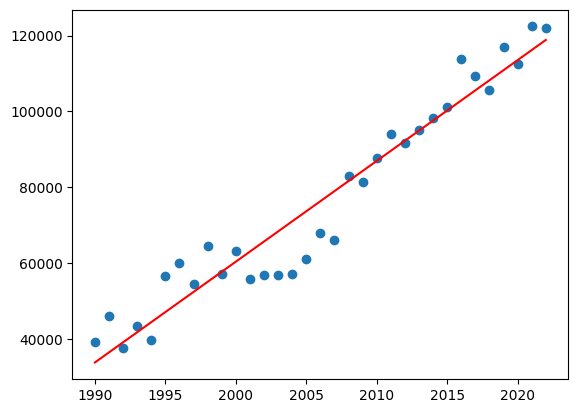

In [7]:
plt.scatter(data['Years'], data['Salary'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

### Defining the Predict Function


In [8]:
def predict(x):
    return intercept + coefficient * x

### Creating the Predicted Salary Data

In [9]:
predicted_data = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                               'Salary': [predict(i) for i in range(2023,2051)]})
predicted_data

,Years,Salary
0,2023,121492.440341
1,2024,124147.492981
2,2025,126802.545622
3,2026,129457.598262
4,2027,132112.650902
5,2028,134767.703543
6,2029,137422.756183
7,2030,140077.808824
8,2031,142732.861464
9,2032,145387.914104


### Joinig The Predicted Data and our Primary Data

In [10]:
complete_data = pd.concat([data,predicted_data], ignore_index=True)
complete_data = complete_data.sort_values('Years', ignore_index=True)
complete_data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,NaN,NaN,NaN,NaN
57,2047,185213.703710,NaN,NaN,NaN,NaN
58,2048,187868.756350,NaN,NaN,NaN,NaN
59,2049,190523.808991,NaN,NaN,NaN,NaN


## Future Values for Materials


#### We use F/P factor with i = 6% and create future values.


In [11]:
material_future_values = [present_to_future(0.06, i, data.loc[data['Years'] == 2022, 'material 1']) for i in range(1, 29)]
material_future_values = np.array(material_future_values).reshape(28,)
material_future_values


array([1368.11797656, 1450.20505515, 1537.21735846, 1629.45039997,
       1727.21742397, 1830.85046941, 1940.70149757, 2057.14358743,
       2180.57220267, 2311.40653483, 2450.09092692, 2597.09638254,
       2752.92216549, 2918.09749542, 3093.18334514, 3278.77434585,
       3475.5008066 , 3684.030855  , 3905.0727063 , 4139.37706868,
       4387.7396928 , 4651.00407436, 4930.06431883, 5225.86817796,
       5539.42026863, 5871.78548475, 6224.09261384, 6597.53817067])

In [12]:
print("Length of material_future_values:", len(material_future_values))


Length of material_future_values: 28


#### Defining a dataframe to assign future values for material 1.

In [13]:
material1_future = pd.DataFrame({'Years': [i for i in range(2023, 2051)],
                                 'material 1': material_future_values})

material1_future

,Years,material 1
0,2023,1368.117977
1,2024,1450.205055
2,2025,1537.217358
3,2026,1629.450400
4,2027,1727.217424
5,2028,1830.850469
6,2029,1940.701498
7,2030,2057.143587
8,2031,2180.572203
9,2032,2311.406535


#### Then we combine it with the main data.

In [14]:
complete_data.set_index('Years', inplace=True)
material1_future.set_index('Years', inplace=True)
complete_data.update(material1_future)
complete_data.reset_index(inplace=True)
complete_data


,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,5225.868178,NaN,NaN,NaN
57,2047,185213.703710,5539.420269,NaN,NaN,NaN
58,2048,187868.756350,5871.785485,NaN,NaN,NaN
59,2049,190523.808991,6224.092614,NaN,NaN,NaN


#### In order to predict the values of material 2, we bring all the prices to the year 1990 and then we find out how the values are changing; after that, we bring each price back to the future.

In [15]:
data['material_2_in_1990'] = future_to_present(.05, data['Years'] - 1990, data['material 2'])
data

,Years,Salary,material 1,material 2,demand,price,material_2_in_1990
0,1990,39343.0,200.000000,89.600000,103,1200.0,89.60
1,1991,46205.0,212.000000,92.662500,104,1375.0,88.25
2,1992,37731.0,224.720000,95.807250,101,1451.0,86.90
3,1993,43525.0,238.203200,99.034819,99,1593.0,85.55
4,1994,39891.0,252.495392,102.345626,95,1718.5,84.20
5,1995,56642.0,267.645116,105.739927,96,1844.0,82.85
6,1996,60150.0,283.703822,109.217795,95,1969.5,81.50
7,1997,54445.0,300.726052,112.779099,92,2095.0,80.15
8,1998,64445.0,318.769615,116.423489,92,2220.5,78.80
9,1999,57189.0,337.895792,120.150370,87,2346.0,77.45


#### We use linear regression to predict what would the prices of material 2 for the future be worth in the year 1990.

In [43]:
X = data['Years'].values.reshape(-1,1)
Y = data['material_2_in_1990'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

#### The Accuracy of our modeling.


In [17]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score

1.0

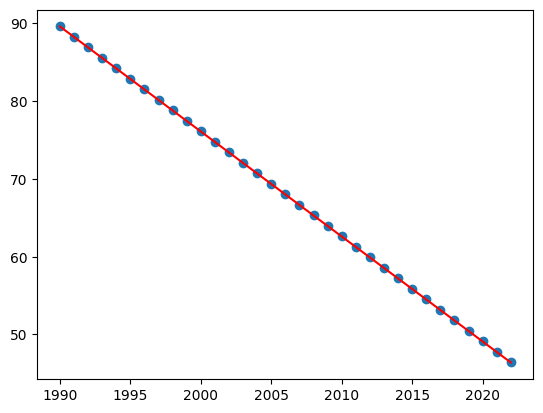

In [18]:
plt.scatter(data['Years'], data['material_2_in_1990'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

In [19]:
material2_predicted = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                               'material_2_in_1990': [predict(i) for i in range(2023,2051)]})
material2_predicted

,Years,material_2_in_1990
0,2023,45.05
1,2024,43.70
2,2025,42.35
3,2026,41.00
4,2027,39.65
5,2028,38.30
6,2029,36.95
7,2030,35.60
8,2031,34.25
9,2032,32.90


#### We bring the predicted prices to the future with i = 5%.

In [20]:
material2_predicted['material 2'] = present_to_future(.05, material2_predicted['Years'] - 1990, material2_predicted['material_2_in_1990'])
material2_predicted

,Years,material_2_in_1990,material 2
0,2023,45.05,225.393644
1,2024,43.70,229.571306
2,2025,42.35,233.603251
3,2026,41.00,237.464462
4,2027,39.65,241.127785
5,2028,38.30,244.563780
6,2029,36.95,247.740555
7,2030,35.60,250.623598
8,2031,34.25,253.175594
9,2032,32.90,255.356231


In [21]:
material2_series =pd.DataFrame({'Years': [i for i in range(2023,2051)],
                             'material 2': material2_predicted['material 2']})
material2_series


,Years,material 2
0,2023,225.393644
1,2024,229.571306
2,2025,233.603251
3,2026,237.464462
4,2027,241.127785
5,2028,244.563780
6,2029,247.740555
7,2030,250.623598
8,2031,253.175594
9,2032,255.356231


#### at last, we combine it with the main data.

In [22]:
complete_data.set_index('Years', inplace=True)
material2_series.set_index('Years', inplace=True)
complete_data.update(material2_series)
complete_data.reset_index(inplace=True)
complete_data


,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,5225.868178,215.143774,NaN,NaN
57,2047,185213.703710,5539.420269,204.117656,NaN,NaN
58,2048,187868.756350,5871.785485,191.451066,NaN,NaN
59,2049,190523.808991,6224.092614,177.007523,NaN,NaN


#### Now we plot what we've predicted.

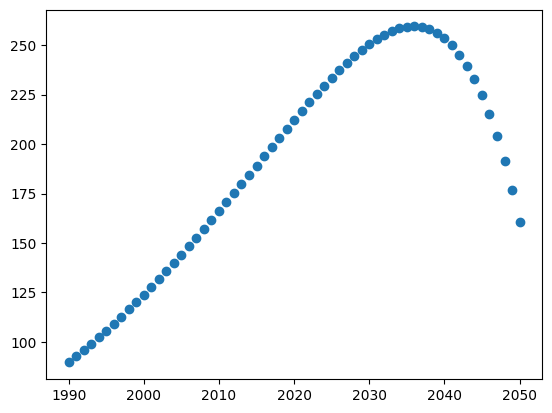

In [45]:
plt.scatter(complete_data['Years'], complete_data['material 2'])
# plt.plot(complete_data['Years'], model.predict(X), c='red')
plt.show()

#### Defining the function for demand:

In [24]:
def demand_function(n):
    return np.exp(-n / 50)

#### Based on the project doc, the demand is equal to demand_factor * factor_d:

In [56]:
complete_data['demand_factor'] = demand_function(complete_data['Years']- 1990)
data['demand_factor'] = demand_function(data['Years']- 1990)
data['factor_d'] = data['demand']/data['demand_factor']
data

,Years,Salary,material 1,material 2,demand,price,material_2_in_1990,demand_factor,factor_d
0,1990,39343.0,200.000000,89.600000,103,1200.0,89.60,1.000000,103.000000
1,1991,46205.0,212.000000,92.662500,104,1375.0,88.25,0.980199,106.100939
2,1992,37731.0,224.720000,95.807250,101,1451.0,86.90,0.960789,105.121888
3,1993,43525.0,238.203200,99.034819,99,1593.0,85.55,0.941765,105.121818
4,1994,39891.0,252.495392,102.345626,95,1718.5,84.20,0.923116,102.912271
5,1995,56642.0,267.645116,105.739927,96,1844.0,82.85,0.904837,106.096408
6,1996,60150.0,283.703822,109.217795,95,1969.5,81.50,0.886920,107.112201
7,1997,54445.0,300.726052,112.779099,92,2095.0,80.15,0.869358,105.825189
8,1998,64445.0,318.769615,116.423489,92,2220.5,78.80,0.852144,107.963000
9,1999,57189.0,337.895792,120.150370,87,2346.0,77.45,0.835270,104.157911


#### Now we predict the demand, based on demand_factor:

In [61]:
X = data['demand_factor'].values.reshape(-1,1)
Y = data['demand'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [62]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score

0.9849573838479752

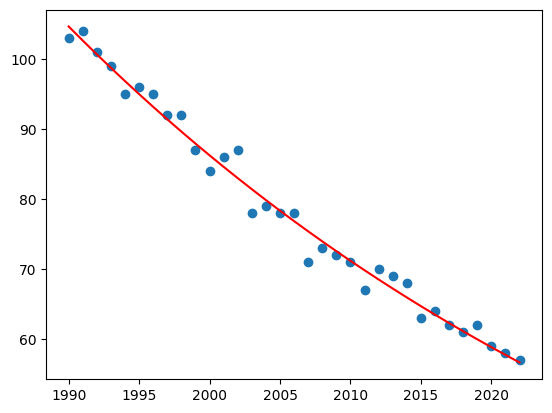

In [63]:
plt.scatter(data['Years'], data['demand'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

In [29]:
X = data['Years'].values.reshape(-1,1)
Y = data['price'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)


LinearRegression()

In [30]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score


0.9999653378861689

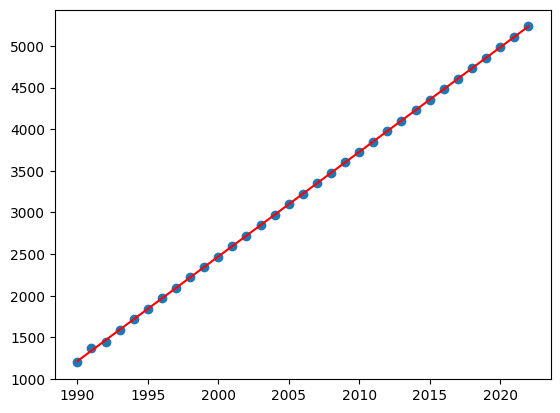

In [31]:
plt.scatter(data['Years'], data['price'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

In [35]:
complete_data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,5225.868178,215.143774,NaN,NaN
57,2047,185213.703710,5539.420269,204.117656,NaN,NaN
58,2048,187868.756350,5871.785485,191.451066,NaN,NaN
59,2049,190523.808991,6224.092614,177.007523,NaN,NaN
